# AML HW 4
# Submitted by Hima Bindu (hb2635), Swarna Bharathi Mantena (sm4776)
# TASK 1

In [1]:
import pandas as pd
dataset = pd.read_csv('winemag-data-130k-v2.csv')
dataset.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [3]:
for name in dataset.columns:
    print(name,len(dataset[name].unique()))

Unnamed: 0 129971
country 44
description 119955
designation 37980
points 21
price 391
province 426
region_1 1230
region_2 18
taster_name 20
taster_twitter_handle 16
title 118840
variety 708
winery 16757


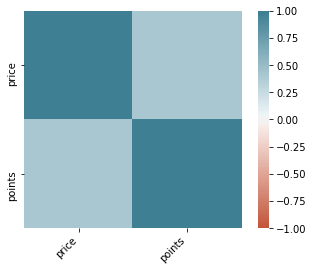

In [4]:
# Correlation Analysis

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

cont_data = dataset[['price', 'points']]

corr = cont_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

We do not see any strong correlation among these two numeric values

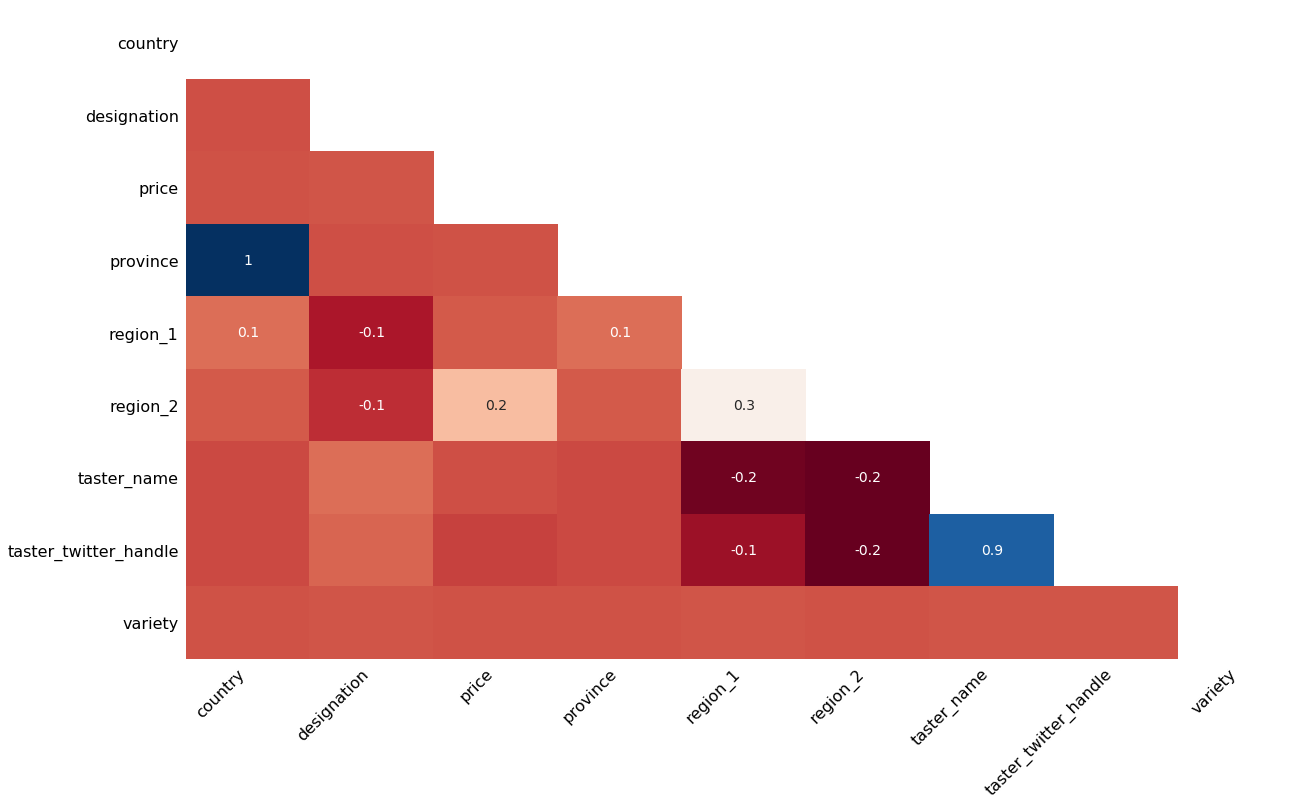

In [5]:
# missing data analysis
import missingno as msno 
msno.heatmap(dataset) 

We observe that region is missiong each time the country name is missing which makes sense. We also observe that when the taster name is missin, their twitter handle name is also missing at most times. 

# Task-1.1 
Baseline model for predicting wine quality using only non-text features

# Approach:

Text data columns are: description, title. (are removed) <br> <br>
Taster twitter handle is redundant ( all tasters may not have twitter handle, or there may be null entries as is seem from above.),  <br><br>
country, variety, winery, province, designation, taster_name, region1, region2 are dealth with as categorical variables.<br><br>
Price is the target variable. Therefore, the baseline mode will have:<br><br>
price (numeric data)<br><br>
country, variety, winery, province, designation, taster_name, region1, region2 (categorical)<br><br>

To be target encoded: designation, province, region1, variety, winery because they contain large number of categories. <br><br>

# Preprocessing steps: 

- Removing outliers from price (numeric data) [Feature Engineering]


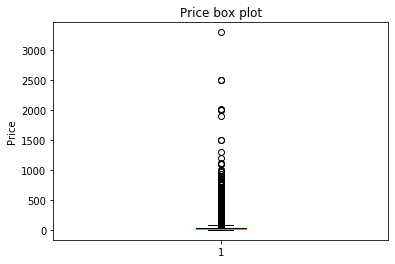

In [6]:
import matplotlib.pyplot as plt
plt.boxplot(dataset['price'].dropna())
plt.title("Price box plot")
plt.ylabel("Price")
plt.show()

We can remove the outliers of price column (all those above upper quartile + 1.5*inter quartile range) since there are not enough data points in that range of target variable (price) that can help train a model well.

Price - upper whishker =  79.0

Here is the boxplot of price after the outliers are removed.


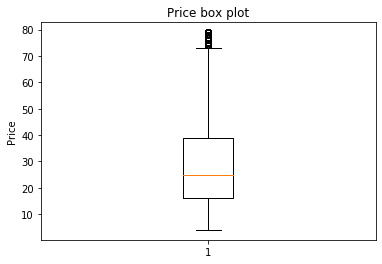

In [7]:
stats = dataset['price'].describe()

upper_quartile = stats[6]
lower_quartile = stats[4]

iqr = upper_quartile - lower_quartile
upper_whisker = dataset['price'][dataset.price<=upper_quartile+1.5*iqr].max()
price_wo_outliers = dataset['price'][dataset.price<=upper_quartile+1.5*iqr]
# upper_whisker = data[data<=upper_quartile+1.5*iqr].max()
print("Price - upper whishker = ", upper_whisker)

print("\nHere is the boxplot of price after the outliers are removed.")
import matplotlib.pyplot as plt
plt.boxplot(price_wo_outliers)
plt.title("Price box plot")
plt.ylabel("Price")
plt.show()

dataset_updated = dataset[dataset.price<=upper_quartile+1.5*iqr]

In [8]:
print('actual dataset:', len(dataset))
print('updated dataset:', len(dataset_updated))
print('Difference: ',len(dataset) - len(dataset_updated) )

actual dataset: 129971
updated dataset: 113734
Difference:  16237


By removing the outliers in 'price' column, we were able to reduce more than 16,000 rows of data.

In [9]:
#Updating the Dataset
X = dataset_updated.drop(["Unnamed: 0","description", "title", "taster_twitter_handle","points"], axis = 1)
y = dataset_updated["points"]

In [10]:
#Data Imputation - Dealing with Missing Values (Mean Imputation for Numeric Features and 
# 'most frequent' value imputation for categorical features)

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from category_encoders import TargetEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y)
#imputation
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X], index=X.columns)
        return self

    def transform(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X], index=X.columns)
        return X.fillna(self.fill)

X_train = DataFrameImputer().fit_transform(X_train)
X_test = DataFrameImputer().transform(X_test)

#model
categorical = X_train.columns[X_train.dtypes == object]
# categorical
preprocess = make_column_transformer((TargetEncoder(), ['designation', 'province', 'region_1', 'variety', 'winery']), (OneHotEncoder(handle_unknown = 'ignore'), categorical.drop(['designation', 'province', 'region_1', 'variety', 'winery'])))
model_lr = make_pipeline(preprocess, LinearRegression())
scores_lr = cross_val_score(model_lr, X_train, y_train)

np.mean(scores_lr)

0.38266941112890224

The baseline model gives an R^2 value of 0.38.

# Task-1.2
Simple text-based model using a bag-of-words approach and a linear model

In [11]:
#Dataset after removing unnecessary features
X_t12 = dataset_updated.drop(["Unnamed: 0", "taster_twitter_handle","points"], axis = 1)
X_t12['description+title'] = X_t12['description'] + X_t12['title']
y_t12 = dataset_updated["points"]

In [12]:
# Data Imputation
X_train, X_test, y_train, y_test = train_test_split(X_t12, y_t12)
#imputation
from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X], index=X.columns)
        return self

    def transform(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X], index=X.columns)
        return X.fillna(self.fill)

X_train = DataFrameImputer().fit_transform(X_train)
X_test = DataFrameImputer().transform(X_test)


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack

vect = CountVectorizer(min_df = 2)
X_train_df_title = vect.fit_transform(X_train['title'])
X_train_df4 = vect.fit_transform(X_train['description'])
X_train_bow_only = hstack([X_train_df4,X_train_df_title])

#model
lr = LinearRegression().fit(X_train_bow_only, y_train)
scores_lr = cross_val_score(lr, X_train_bow_only, y_train) #cross val score
np.mean(scores_lr)

0.4454531402447646

We get an R^2 value of 0.454 for our BoG + linear model. The score has become better in this case compared to baseline model. 

In [14]:
#removing stop words
from sklearn.feature_extraction.text import CountVectorizer
# print(X_train_df_title.shape)
vect = CountVectorizer(min_df = 2, stop_words='english')
X_train_df_title_sw = vect.fit_transform(X_train['title'])
X_train_df4_sw = vect.fit_transform(X_train['description'])
X_train_bow_sw = hstack([X_train_df4_sw,X_train_df_title_sw])

#model
lr_sw = LinearRegression().fit(X_train_bow_sw, y_train)
scores_lr_sw = cross_val_score(lr_sw, X_train_bow_sw, y_train)
np.mean(scores_lr_sw)

0.44670022257268877

Here, removing stopwords has improved the R^2 value slightly.

In [15]:
#trying ridge regression

from sklearn.linear_model import Ridge
#without removing stop words
X_train_bow_only = hstack([X_train_df4,X_train_df_title])
ridge = Ridge().fit(X_train_bow_only, y_train)
scores_ridge = cross_val_score(ridge, X_train_bow_only, y_train)

np.mean(scores_ridge)

0.7143091452735748

In [16]:
#removing stop words -- ridge regression

vect = CountVectorizer(min_df = 2, stop_words='english')
X_train_df_title_sw = vect.fit_transform(X_train['title'])
X_train_df4_sw = vect.fit_transform(X_train['description'])
X_train_bow_sw = hstack([X_train_df4_sw,X_train_df_title_sw])

#model
ridge_sw = Ridge().fit(X_train_bow_sw, y_train)
scores_ridge_sw = cross_val_score(ridge_sw, X_train_bow_sw, y_train)
np.mean(scores_ridge_sw)

0.7085714339854761

Ridge Regression performed better than Linear Regression. We got 71 percent accuracy with Ridge Regression - without removing stop words in the BoW model. To find the best hyperparameters in Ridge Regression, we can perform GridSearch on it as follows:

In [18]:
### GridSearchCV on Ridge Regression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

param_grid = {"ridge__alpha": [1.0, 5.0, 10.0, 15.0, 20.0],
              "countvectorizer__min_df": [1, 2, 3],
              "normalizer": [None, Normalizer()]
             }
grid_ridge = GridSearchCV(make_pipeline(CountVectorizer(), Normalizer(), Ridge()),
                    param_grid=param_grid, cv=5)
grid_ridge.fit(X_train['description+title'], y_train)
print("Best score: ", grid_ridge.best_score_)
print("Best parameters: ", grid_ridge.best_params_)

Best score:  0.7394245461058908
Best parameters:  {'countvectorizer__min_df': 1, 'normalizer': None, 'ridge__alpha': 10.0}


In [19]:
import matplotlib.pyplot as plt
def plot_graph(X, y, title, xlabel, ylabel, need_log_x, lab):
    plt.plot(X, y, label=lab)
    if (need_log_x == 1):
        plt.xscale('log')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.xticks(np.arange(0, 21, step = 2))
    plt.ylabel(ylabel)
    plt.grid()
    if lab:
        plt.legend()

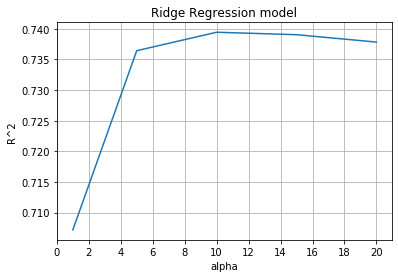

In [20]:
ridge_vals = [d['ridge__alpha'] for d in grid_ridge.cv_results_['params'][:5]]
# plot
plot_graph(ridge_vals, grid_ridge.cv_results_['mean_test_score'][:5].tolist(), 'Ridge Regression model', 'alpha', 'R^2', 0, None)

We get the best parameter as: alpha = 10.

# Task-1.3
using n-grams, characters, tf-idf rescaling and possibly other ways to tune the BoW
model.

In [21]:
#n-grams

cv = CountVectorizer(ngram_range=(1, 2), stop_words = 'english')
X_train_df_title_sw_ng = cv.fit_transform(X_train['title'])
X_train_df4_sw_ng = cv.fit_transform(X_train['description'])
X_train_bow_sw_ng = hstack([X_train_df4_sw_ng,X_train_df_title_sw_ng])

#model
ridge = Ridge(alpha = 10).fit(X_train_bow_sw_ng, y_train)
scores_ridge = cross_val_score(ridge, X_train_bow_sw_ng, y_train)

np.mean(scores_ridge)

0.7591895141758747

In [22]:
#n-grams without removing stop words

cv = CountVectorizer(ngram_range=(1, 2))
X_train_df_title_ng = cv.fit_transform(X_train['title'])
X_train_df4_ng = cv.fit_transform(X_train['description'])
X_train_bow_ng = hstack([X_train_df4_ng,X_train_df_title_ng])

#model
ridge = Ridge(alpha = 10).fit(X_train_bow_ng, y_train)
scores_ridge = cross_val_score(ridge, X_train_bow_ng, y_train)

np.mean(scores_ridge)

0.7603795587011019

N Grams gives better R^2 value (without removing stop words) which is 0.76.

In [23]:
#tf-idf

from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
cv_tfidf = TfidfVectorizer()
X_train_df_title_tfidf = cv_tfidf.fit_transform(X_train['title'])
X_train_df4_tfidf = cv_tfidf.fit_transform(X_train['description'])
X_train_bow_tfidf = hstack([X_train_df4_tfidf,X_train_df_title_tfidf])

#model
ridge = Ridge(alpha = 10).fit(X_train_bow_tfidf, y_train)
scores_ridge = cross_val_score(ridge, X_train_bow_tfidf, y_train)

np.mean(scores_ridge)

0.6970117283097867

In [24]:
#character n-gram (respecting boundaries)
cv_cng = CountVectorizer(ngram_range=(2, 3), analyzer="char_wb")

X_train_df_title_cng = cv_cng.fit_transform(X_train['title'])
X_train_df4_cng = cv_cng.fit_transform(X_train['description'])
X_train_bow_cng = hstack([X_train_df4_cng, X_train_df_title_cng])

#model
ridge = Ridge(alpha = 10).fit(X_train_bow_cng, y_train)
scores_ridge = cross_val_score(ridge, X_train_bow_cng, y_train)

np.mean(scores_ridge)

0.7082256895100606

Best score was obtained for : ridge regression model with n grams. The accuracy obtained is 0.76.

# Task 1.4
Combine the non-text features and the text features. How does adding those features
improve upon just using bag-of-words?

In [25]:
#Creating new feature combining text data features
# X_train["description+title"] = X_train["description"] + X_train["title"]

In [26]:
cat_feature = ['country', 'designation', 'province',
'region_1', 'region_2', 'taster_name','variety', 'winery']
text_feature = ['description','title']
cont_feature = ['price']

preprocess = make_column_transformer(('passthrough', cont_feature),(TargetEncoder(), ['designation', 'province', 'region_1', 'variety', 'winery']),
(OneHotEncoder(handle_unknown = 'ignore'), ['country','region_2','taster_name']),(CountVectorizer(ngram_range=(1, 2)),'description+title'))
model_rr = make_pipeline(preprocess, Ridge(alpha = 10))
scores_rr = cross_val_score(model_rr, X_train, y_train)

np.mean(scores_rr)
# make_pipeline(preprocess).fit_transform(X_train, y_train)

0.7778453724152911

The accuracy increased when text-data features (from BoG model) were combined with non-text data features. This can be attributed to the fact that more features were available for the model to learn from. 

So, let us use this model to check performance on the test set. 

In [28]:
preprocess_test = make_column_transformer(('passthrough', cont_feature),(TargetEncoder(), ['designation', 'province', 'region_1', 'variety', 'winery']),
(OneHotEncoder(handle_unknown = 'ignore'), ['country','region_2','taster_name']),(CountVectorizer(ngram_range=(1, 2)),'description+title'))

model_rr_test = make_pipeline(preprocess_test, Ridge(alpha = 10))
model_rr_test.fit(X_train, y_train)
score_test = model_rr_test.score(X_test, y_test)
print(score_test)

0.7874087455346871
